<a href="https://colab.research.google.com/github/marant482/MLclass/blob/main/Lab03_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Optimizing the Classification Threshold in Logistic Regression**

-------------------------------

In this assignment, you will explore the concept of **classification thresholds** in **Logistic Regression** and investigate whether the commonly used threshold of **0.5** is always the optimal choice. To complete this assignment, you will need to conduct **additional reading** on **ROC curves** and the **AUC metric**, beyond the materials covered in class.

This exercise focuses on the **importance of threshold selection** and how it impacts model performance based on different evaluation criteria.



## **The Objective**

**Is a 0.5 threshold always the best choice in Logistic Regression?**

- Analyze if the standard threshold of **0.5** always yields the most desirable results in various scenarios.
- Investigate alternative thresholds and how they can improve model performance depending on the problem context.



## **Helper Questions**

1. **Would a different threshold yield better results?**  
   - How does shifting the threshold affect the **trade-off between sensitivity and specificity**?

2. **How do you define "better" results?**  
   - Is **higher specificity** more valuable than **higher sensitivity** in certain contexts? Or maybe the other way around?
   - Does the **best threshold** depend on the task? (discuss cases like *disease detection* vs. *spam filtering*)

3. **How does a ROC curve help in this process?**  
   - Learn how to use a **ROC curve** to visualize the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)**.

4. **How do you select the optimal threshold using the ROC curve?**  
   - Discuss strategies to select a threshold depending on the specific task at hand and the acceptable **trade-off between sensitivity and specificity**.

5. **What is the AUC metric and how is it useful?**  
   - Define **AUC (Area Under the Curve)** and discuss its role in evaluating the overall performance of a classifier.



## **Tasks & Deliverables**

1. **Colab Notebook**
   - Select a suitable classification 2-class dataset.
   - Divide the dataset into three parts: **train**, **validation**, and **test**.
   - Train the **Logistic Regression** model on the **training** set.
   - Use the **validation** set to:
     - Plot the **ROC curve**.
     - Calculate the **AUC**.
     - Determine the **optimal threshold** using the ROC curve for your dataset.
   - Apply the selected threshold to the **test** set to evaluate final model performance using metrics like:
     - **Accuracy**
     - **Precision & Recall**
     - **F1-Score**
     - **Specificity & Sensitivity**

2. **Answer the Questions:**
   - Use markdown cells to provide explanations.
   - Answer all helper questions with supporting evidence from your plots and results.

3. **Visualizations:**
   - **ROC curve** based on the **validation** set with threshold points marked.
   - Highlight the **optimal threshold** on the ROC curve.

4. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




AUC na zbiorze walidacyjnym: 0.99
Optymalny próg: 0.20


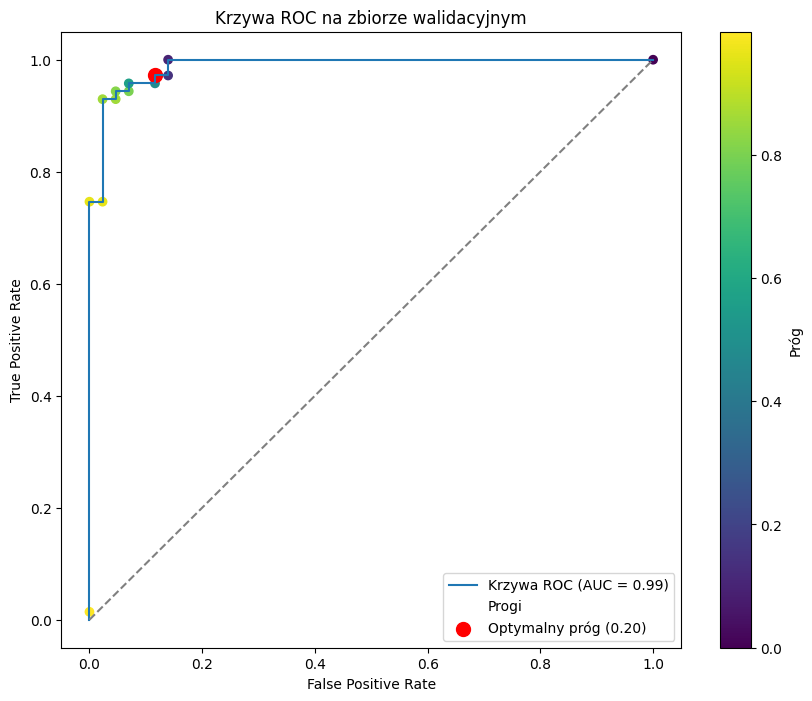


Metryki na zbiorze testowym:
Accuracy: 0.96
Precision: 0.94
Sensitivity: 1.00
F1-score: 0.97
Specificity: 0.88


In [47]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Wczytanie danych
data = load_breast_cancer()
X = data.data
y = data.target

# Podział na zbiór treningowy, walidacyjny i testowy
# Najpierw dzielimy na train+validation oraz test (80% - 20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
# Następnie dzielimy train+validation na training (60% całości) i validation (20% całości)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

# Trenowanie modelu regresji logistycznej
model = LogisticRegression(max_iter=10000, solver='liblinear')
model.fit(X_train, y_train)

# Predykcje na zbiorze walidacyjnym (prawdopodobieństwa klasy pozytywnej)
y_val_probs = model.predict_proba(X_val)[:, 1]

# Obliczenie krzywej ROC i wartości AUC
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
roc_auc = auc(fpr, tpr)
print("AUC na zbiorze walidacyjnym: {:.2f}".format(roc_auc))

# Określenie optymalnego progu
optimal_idx = 10
optimal_threshold = thresholds[optimal_idx]
print("Optymalny próg: {:.2f}".format(optimal_threshold))

# Wizualizacja krzywej ROC na zbiorze walidacyjnym z zaznaczonymi punktami odpowiadającymi progom
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label='Krzywa ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# Zaznaczamy wszystkie punkty (przy użyciu koloru odpowiadającego wartości progowej)
sc = plt.scatter(fpr, tpr, c=thresholds, cmap='viridis', label='Progi')
plt.colorbar(sc, label='Próg')
# Wyróżnienie optymalnego punktu
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', s=100,
            label='Optymalny próg ({:.2f})'.format(optimal_threshold))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC na zbiorze walidacyjnym')
plt.legend(loc='lower right')
plt.show()

# Ocena na zbiorze testowym przy wykorzystaniu optymalnego progu
y_test_probs = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_probs >= optimal_threshold).astype(int)

# Obliczanie metryk: Accuracy, Precision, Recall, F1-score, Specificity & Sensitivity
acc = accuracy_score(y_test, y_test_pred)
prec = precision_score(y_test, y_test_pred)
rec = recall_score(y_test, y_test_pred)  # Recall to Sensitivity
f1 = f1_score(y_test, y_test_pred)
# Obliczenie Specificity: TN / (TN + FP)
cm = confusion_matrix(y_test, y_test_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

print("\nMetryki na zbiorze testowym:")
print("Accuracy: {:.2f}".format(acc))
print("Precision: {:.2f}".format(prec))
print("Sensitivity: {:.2f}".format(rec))
print("F1-score: {:.2f}".format(f1))
print("Specificity: {:.2f}".format(specificity))


Zmiana progu decyzyjnego może poprawić wyniki modelu, zależnie od kontekstu zadania. Domyślny próg 0.5 jest powszechnie używany, ale nie zawsze jest optymalny. Dostosowanie progu pozwala lepiej zbalansować między false positives, a false negatives.

1. obniżenie progu zwiększa czułość, czyli model wychwytuje więcej przypadków pozytywnych, ale może to prowadzić do wzrostu liczby fałszywych alarmów, czyli obniżenia specifisity.
Podniesienie progu zwiększa specifisity, czyli model lepiej identyfikuje przypadki negatywne, ale może przegapić niektóre prawdziwie pozytywne przypadki (obniżenie czułości)

2. „Lepsze” wyniki mogą być definiowane na kilka sposobów w zależności od priorytetów:

  -Maksymalizacja czułości: Ważna, gdy istotne jest wychwycenie jak największej liczby prawdziwych pozytywów (np. w diagnostyce chorób).

  -Maksymalizacja specifisity: Kluczowa, gdy błędna klasyfikacja negatywów może prowadzić do niepożądanych konsekwencji (np. w filtrowaniu spamu, gdzie ważne jest unikanie oznaczania ważnych wiadomości jako spam).

  -Zbalansowany kompromis: W niektórych przypadkach można dążyć do optymalizacji obu miar, wykorzystując metryki takie jak F1-score

3. Krzywa ROC wizualizuje kompromis między czułością True Positive Rate, a False Positive Rate dla różnych progów decyzyjnych.
4. Zależy to od kontekstu (tak jak przedyskutowane wyżej), natomiast część punktów jest jednoznacznie porównywalna, jeżeli punkty mają równą pierwszą współrzędną, to wybieramy te, w których druga współrzędna jest większa, jeżeli natomiast mają drugą współrzędną równą, to wybieramy ten punkt, który ma mniejszt False Negative Rate. W większości jednak musimy sami zastanowić się, gdzie sytuacja jest optymalna.
Przykładem może być powyższy zbiór danych. Przy progu 56% Sensitivity jest równe 96%, to może być dużo dla większości przypadków, ale dane dotyczą diagnostyki raka piersi, w tym przypadku aż u 4 na 100 pacjentów nie wykrytoby groźnej choroby. Przy wybranym progu - 20%, Sensitivity jest równe prawie 100%. Spadek specifisity z 95% do 88% jest w tym przypadku opłacalny.

5. AUC jest to pole pod krzywą ROC, które podsumowuje zdolność modelu do rozróżniania między klasami przy różnych progach decyzyjnych.

Wartość bliska 1: Oznacza, że model ma wysoką zdolność rozróżniania między klasami.

Wartość bliska 0.5: Oznacza, że model działa podobnie do losowego wyboru.

AUC jest szczególnie użyteczna do porównywania różnych modeli